# Get to know data. Check for NaN values in dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("C:/Users/kater/Downloads/heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Features descriprion:
* **sex**: 1 - male, 0 - female

* **cp**: Chest pain type (4 values)

* **trestbps**: Resting blood pressure (mm Hg)

* **chol**: Serum cholesterol in mg/dl

* **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

* **restecg**: Resting electrocardiographic results (values 0, 1, 2)

* **thalach**: Maximum heart rate achieved

* **exang**: Exercise induced angina (1 = yes; 0 = no)

* **oldpeak**: ST depression induced by exercise relative to rest

* **slope**: The slope of the peak exercise ST segment

* **ca**: Number of major vessels (0-3) colored by fluoroscopy

* **thal**: Thallium stress test result (0 = normal; 1 = fixed defect; 2 = reversible defect)

* **target**: Presence of heart disease (1 = yes, 0 = no)
no disease, 1 = disease
ldummy values.

## Checking for NaN values in the data:

In [3]:
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Check, if the data is normally distributed

In [4]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


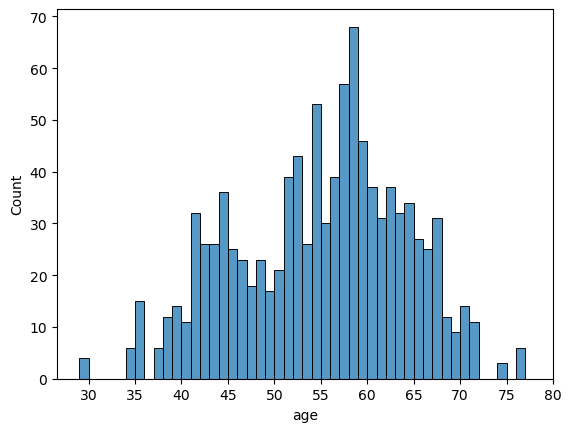

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

sns.histplot(data=df, x="age", binwidth=1, ax=ax)

custom_ticks = [i for i in range(30, 85, 5)]  
ax.set_xticks(custom_ticks) 

plt.show()

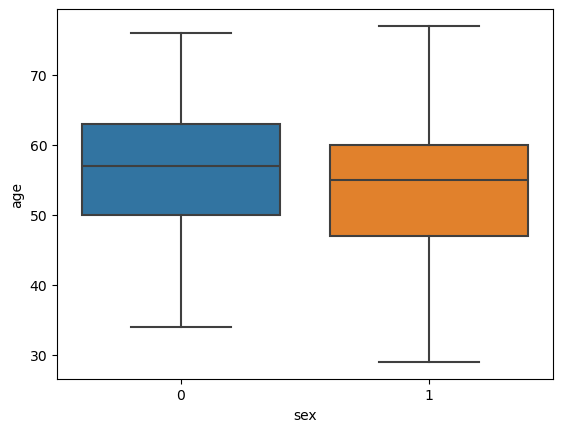

In [6]:
sns.boxplot(data=df, x="sex", y ="age")
plt.show()

In [7]:
df["sex"].value_counts() #1 = male

sex
1    713
0    312
Name: count, dtype: int64

## Checking up the datetypes to state, if I need to change any for further analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Check for outliers in the data

### Cholesterol column

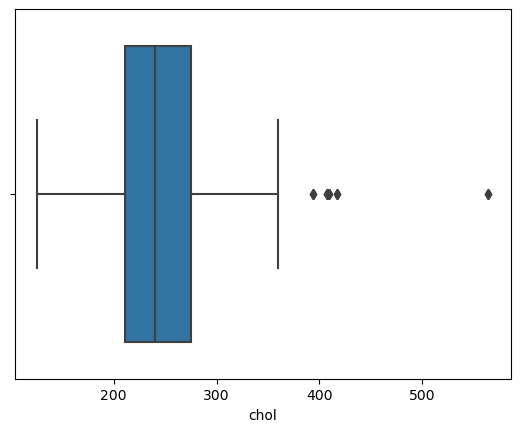

In [10]:
sns.boxplot(data=df, x="chol")
plt.show()

#### Defining lower and upper outliers using interquartile range (IQR):

Der Interquartilsabstand mit IQR (nach der englischen Bezeichnung interquartile range)abgekürzt, ist ein Streuungsmaß in der deskriptiven Statistik. Sortiert man eine Stichprobe der Größe nach, so gibt der Interquartilsabstand an, wie breit das Intervall ist, in dem die mittleren 50 % der Stichprobeelemente liegen (Quelle: https://de.wikipedia.org/wiki/Interquartilsabstand_(deskriptive_Statistik))

In [11]:
def get_outliers(columnname):
    #75 percentile in cholesterol column
    seventy_fifth = df[columnname].quantile(0.75)
    #25 percentile in cholesterol column
    twenty_fifth = df[columnname].quantile(0.25)
    #iqr
    iqr = seventy_fifth - twenty_fifth
    
    # upper threshhold for an cholesterol outlier
    upper = seventy_fifth + (1.5 * iqr)
    # lower threshhold for an cholesterol outlier
    lower = twenty_fifth - (1.5 * iqr)

    return lower, upper


In [12]:
print(get_outliers("chol"))

(115.0, 371.0)


In [13]:
# print out all the outlier data
lower = get_outliers("chol")[0]
upper = get_outliers("chol")[1]
df[(df["chol"] < lower) | (df["chol"] > upper)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
255,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
464,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
481,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
542,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
578,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1


### Resting blood pressure (trestbps) column

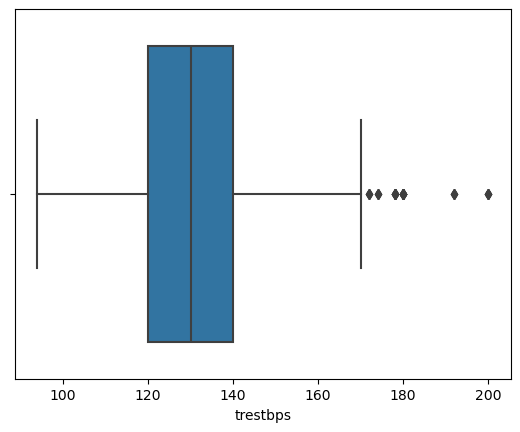

In [14]:
sns.boxplot(data=df, x="trestbps")
plt.show()

In [15]:
print(get_outliers("trestbps"))

(90.0, 170.0)


In [16]:
# print out all the outlier data
lower = get_outliers("trestbps")[0]
upper = get_outliers("trestbps")[1]
df[(df["trestbps"] < lower) | (df["trestbps"] > upper)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
47,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
229,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
246,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
257,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
294,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0


###  Thalamic threshold (thalach) column, meaning maximum heart rate achieved

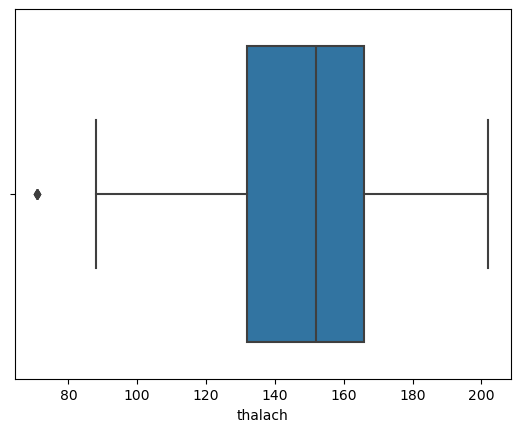

In [17]:
sns.boxplot(data=df, x="thalach")
plt.show()

In [18]:
print(get_outliers("thalach"))

(81.0, 217.0)


In [19]:
# print out all the outlier data
lower = get_outliers("thalach")[0]
upper = get_outliers("thalach")[1]
df[(df["thalach"] < lower) | (df["thalach"] > upper)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
296,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
378,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
559,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


### Oldpeak column (= ST depression induced by exercise relative to rest):

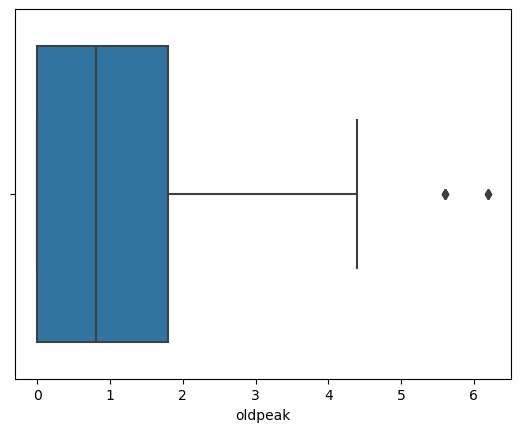

In [20]:
sns.boxplot(data=df, x="oldpeak")
plt.show()

In [21]:
print(get_outliers("oldpeak"))

(-2.7, 4.5)


In [22]:
# print out all the outlier data
lower = get_outliers("oldpeak")[0]
upper = get_outliers("oldpeak")[1]
df[(df["oldpeak"] < lower) | (df["oldpeak"] > upper)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
54,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
69,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
393,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
526,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
613,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
833,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


## Find (linear) correlation in data:

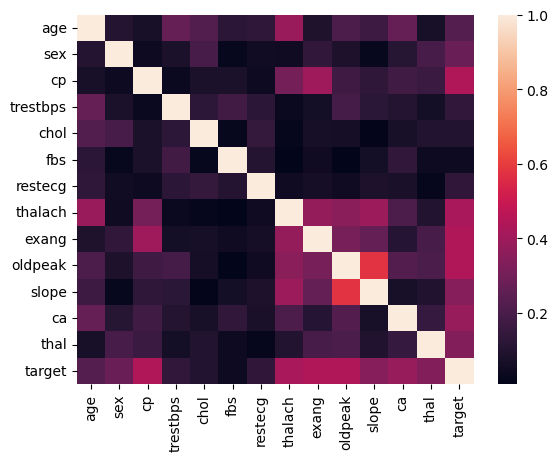

In [23]:
# 0 = weak relationship, closer to 1 or -1 = stronger
sns.heatmap(df.corr().abs(), annot = False)
plt.show()

C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='oldpeak', ylabel='Density'>

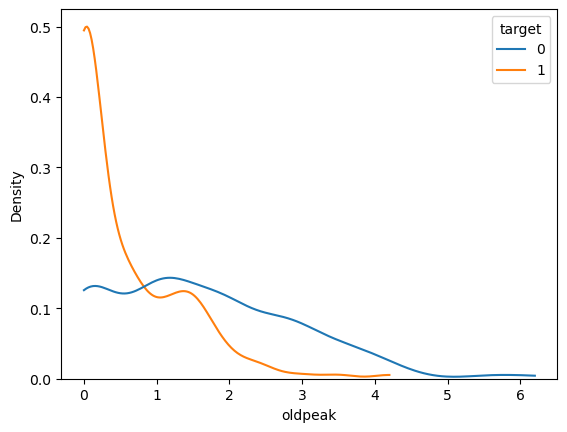

In [24]:
sns.kdeplot(data = df, x = "oldpeak", hue = "target", cut = 0)

C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='exang', ylabel='Density'>

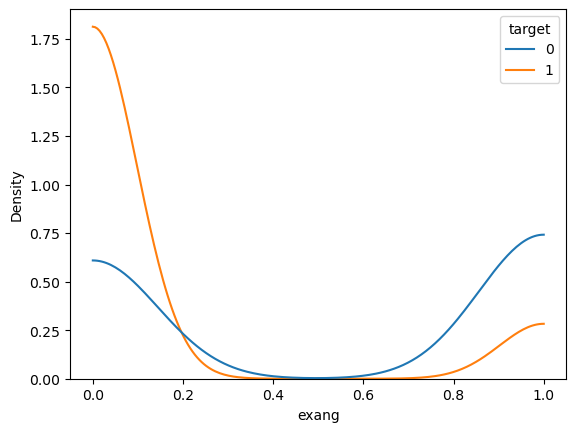

In [25]:
sns.kdeplot(data = df, x = "exang", hue = "target", cut = 0)

C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ca', ylabel='Density'>

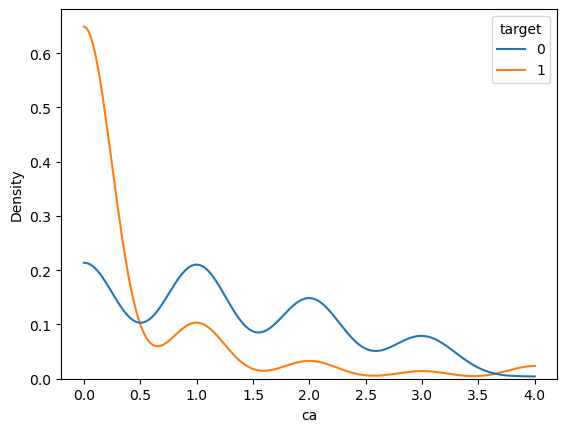

In [26]:
sns.kdeplot(data = df, x = "ca", hue = "target", cut = 0)

C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='thal', ylabel='Density'>

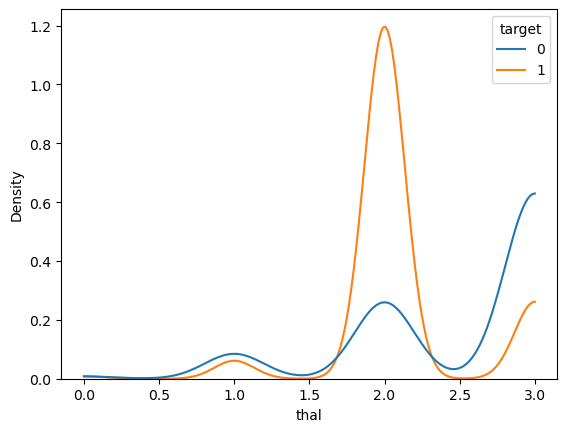

In [27]:
sns.kdeplot(data = df, x = "thal", hue = "target", cut = 0)

ST depression induced by exercise relative to rest can potentially indicate heart disease. Normally, during exercise, the ST segment of the electrocardiogram (ECG) should either remain at baseline or show slight elevation (upsloping or horizontal ST segment). If there is depression of the ST segment during exercise compared to rest, especially if it's significant and occurs consistently, it can be a sign of myocardial ischemia or inadequate blood flow to the heart muscle during exertion (Quelle: https://pubmed.ncbi.nlm.nih.gov/1957757/)

## Deviding dataset into diagnosed and healthy patientse for better comparison of the metrics:

In [28]:
patients_with_no_diagnose = df[~df["target"].isin([1])]
patients_with_no_diagnose.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [29]:
diagnosed_patients = df[df["target"].isin([1])]
diagnosed_patients.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1


In [30]:
patients_with_no_diagnose.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       499 non-null    int64  
 1   sex       499 non-null    int64  
 2   cp        499 non-null    int64  
 3   trestbps  499 non-null    int64  
 4   chol      499 non-null    int64  
 5   fbs       499 non-null    int64  
 6   restecg   499 non-null    int64  
 7   thalach   499 non-null    int64  
 8   exang     499 non-null    int64  
 9   oldpeak   499 non-null    float64
 10  slope     499 non-null    int64  
 11  ca        499 non-null    int64  
 12  thal      499 non-null    int64  
 13  target    499 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 58.5 KB


In [31]:
diagnosed_patients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 5 to 1023
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       526 non-null    int64  
 1   sex       526 non-null    int64  
 2   cp        526 non-null    int64  
 3   trestbps  526 non-null    int64  
 4   chol      526 non-null    int64  
 5   fbs       526 non-null    int64  
 6   restecg   526 non-null    int64  
 7   thalach   526 non-null    int64  
 8   exang     526 non-null    int64  
 9   oldpeak   526 non-null    float64
 10  slope     526 non-null    int64  
 11  ca        526 non-null    int64  
 12  thal      526 non-null    int64  
 13  target    526 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 61.6 KB


## Compare key features from linear correlation (thal, ca, exang, oldpeak) of ill and healthy patients:

<Axes: xlabel='cp', ylabel='count'>

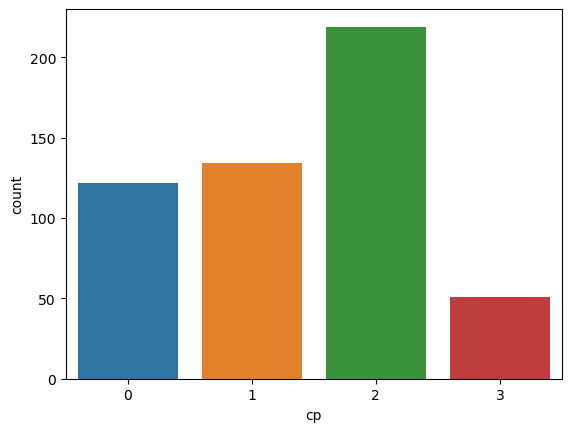

In [32]:
sns.countplot(data = diagnosed_patients, x = "cp")

In [33]:
print(diagnosed_patients["cp"].value_counts())

cp
2    219
1    134
0    122
3     51
Name: count, dtype: int64


<Axes: xlabel='cp', ylabel='count'>

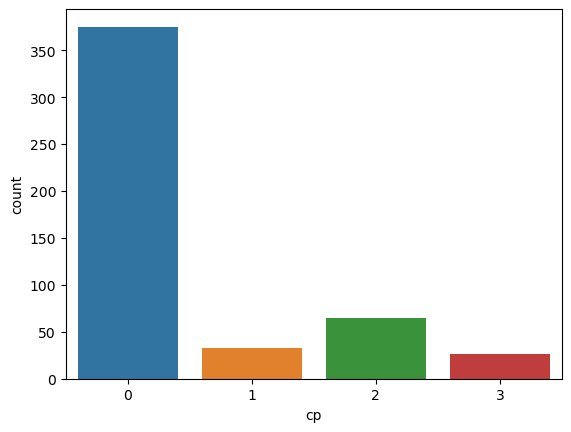

In [34]:
sns.countplot(data = patients_with_no_diagnose, x = "cp")

In [35]:
print(patients_with_no_diagnose["cp"].value_counts())

cp
0    375
2     65
1     33
3     26
Name: count, dtype: int64


<Axes: xlabel='exang', ylabel='count'>

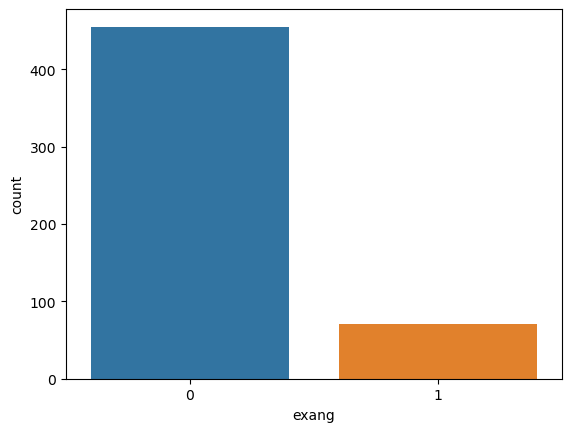

In [36]:
sns.countplot(data = diagnosed_patients, x = "exang")

<Axes: xlabel='exang', ylabel='count'>

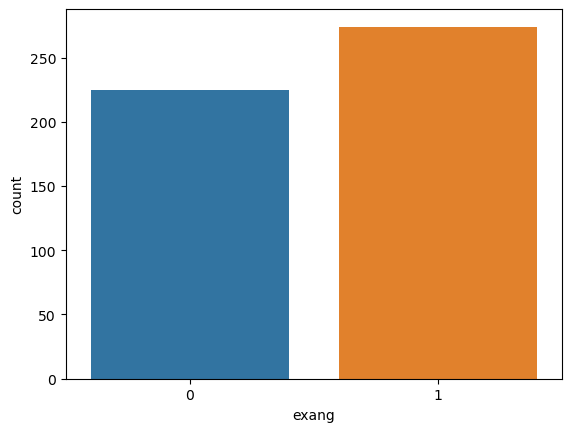

In [37]:
sns.countplot(data = patients_with_no_diagnose, x = "exang")

<Axes: xlabel='ca', ylabel='count'>

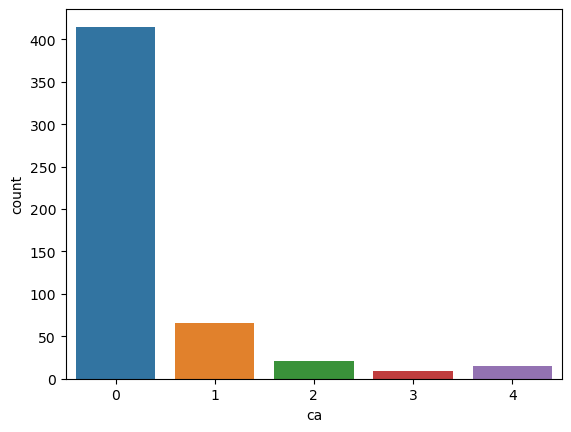

In [38]:
sns.countplot(data = diagnosed_patients, x = "ca")

<Axes: xlabel='ca', ylabel='count'>

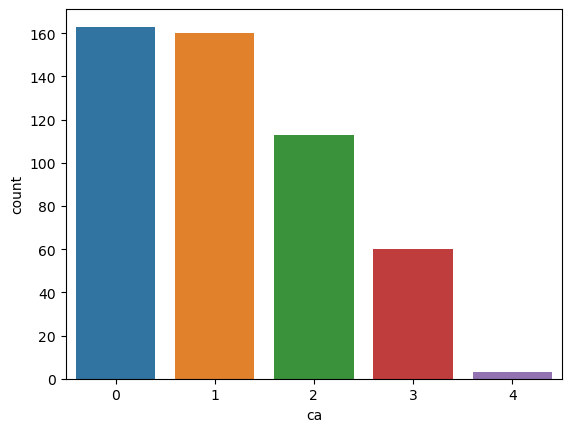

In [39]:
sns.countplot(data = patients_with_no_diagnose, x = "ca")

<Axes: xlabel='ca', ylabel='count'>

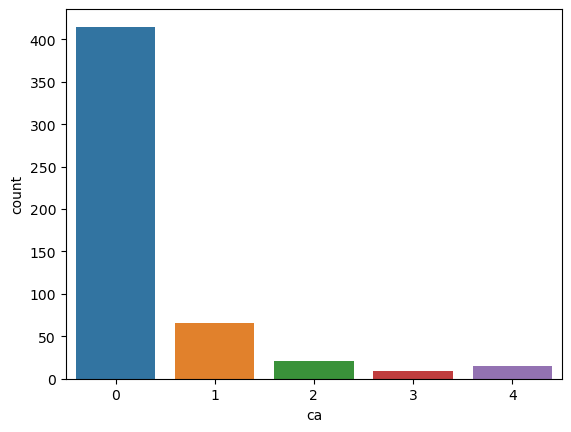

In [40]:
sns.countplot(data = diagnosed_patients, x = "ca")

<Axes: xlabel='ca', ylabel='count'>

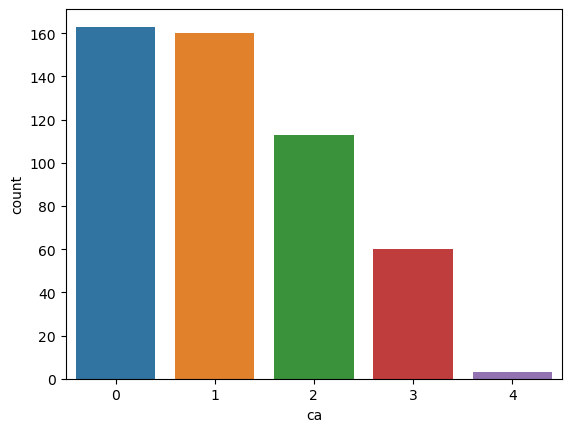

In [41]:
sns.countplot(data = patients_with_no_diagnose, x = "ca") #to relativ values

## Checking up how ill and healthy patients are distributed according to their age

<Axes: xlabel='age', ylabel='count'>

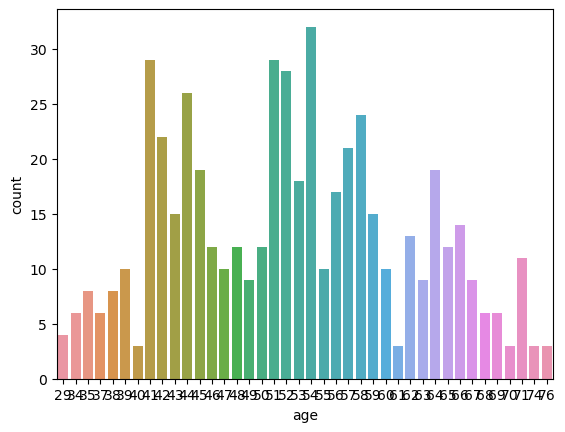

In [42]:
sns.countplot(data = diagnosed_patients, x = "age")

<Axes: xlabel='age', ylabel='count'>

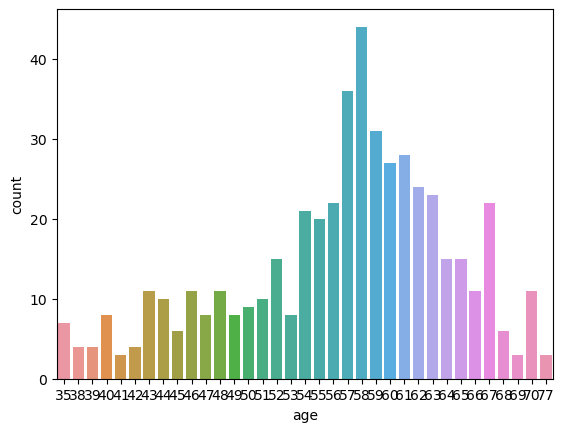

In [43]:
sns.countplot(data = patients_with_no_diagnose, x = "age")

## Checking up how ill and healthy patients are distributed according to their sex

In [44]:
sex_counts = diagnosed_patients["sex"].value_counts()
sex_percentage = (sex_counts / sex_counts.sum()) * 100

sex_distribution = pd.DataFrame({"Count": sex_counts, "Percentage": sex_percentage})

print(sex_distribution)

     Count  Percentage
sex                   
1      300   57.034221
0      226   42.965779


In [45]:
sex_counts = patients_with_no_diagnose["sex"].value_counts()
sex_percentage = (sex_counts / sex_counts.sum()) * 100

sex_distribution = pd.DataFrame({"Count": sex_counts, "Percentage": sex_percentage})

print(sex_distribution)

     Count  Percentage
sex                   
1      413   82.765531
0       86   17.234469


# Hypothesis Tests

## Hypothese 1:

### H0 = 85% der herzerkrankten Patienten haben Brustschmerzen (1, 2, 3 Grads)
### Ha = <85%
#### significance level = alpha = 0.05

In [46]:
hypothesized_percentage_patient_with_cp = 0.85
amount_patient_with_cp = diagnosed_patients[diagnosed_patients["cp"].isin([1, 2, 3])].shape[0]
amount_ill_patient = diagnosed_patients.shape[0]
percentage_patient_with_cp = round(amount_patient_with_cp/ amount_ill_patient, 2)
percentage_patient_with_cp

0.77

In [47]:
#generating a bootstrap distribution
boot_distribution = []
for i in range(5000):
    #step1: resemple
    bootstrap_sample = diagnosed_patients.sample(frac=1, replace=True)

    #step2: calculate point estimate
    sample_amount_patient_with_cp = bootstrap_sample[bootstrap_sample["cp"].isin([1, 2, 3])].shape[0]
    sample_percentage_patient_with_cp = sample_amount_patient_with_cp / amount_ill_patient
    
    boot_distribution.append(sample_percentage_patient_with_cp)

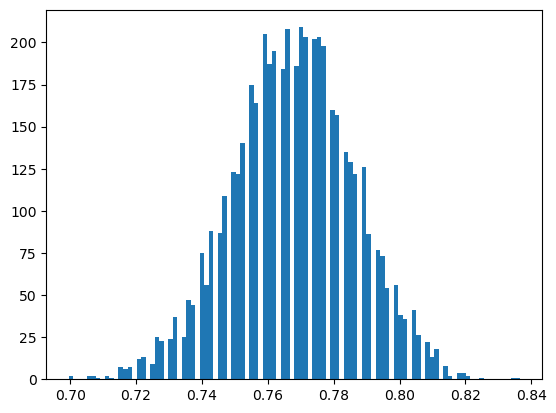

In [48]:
plt.hist(boot_distribution, bins = 100)
plt.show()

In [49]:
std_error = np.std(boot_distribution, ddof = 1)
std_error

0.018526812810105757

In [50]:
z_score = (percentage_patient_with_cp - hypothesized_percentage_patient_with_cp) / std_error
z_score

-4.318065973892856

In [51]:
#calculate p-score
from scipy.stats import norm
p_value = norm.cdf(z_score, loc = 0, scale = 1)
p_value

7.870119276869927e-06

#### How to interpret p-values?
##### Large p_values fail to reject null hypothesis 
##### Small p_values reject null hypothesis
##### If the value is large or small is determined with the help of significance level
##### if p is <=  alpha (significance level), we reject H0, otherwise - we fail to reject H0

In [52]:
p_value <= 0.05

True

In [53]:
lower = np.quantile(boot_distribution, 0.025)
upper = np.quantile(boot_distribution, 0.975)
print(lower, upper)

0.7300380228136882 0.8041825095057035


#### We reject H0 with the confidence of 95% (Confidence interval = 1 - alpha)

## Hypotese2: Mean values comparison of two populations

#### H0 = The mean cholesterol is the same for those who have been diagnosed and those, who have not
#### Ha = The mean cholesterol is greater for those, who diagnosed compared to those, who have not

In [54]:
#first, calculate mean for both populations
chol_mean_diagnosed_patients = diagnosed_patients["chol"].mean()
chol_mean_healthy_patients = patients_with_no_diagnose["chol"].mean()
print(chol_mean_diagnosed_patients, "\n", 
      chol_mean_healthy_patients)

240.97908745247148 
 251.2925851703407


In [55]:
#calculate STD for both populations
chol_std_diagnosed_patients = diagnosed_patients["chol"].std()
chol_std_healthy_patients = patients_with_no_diagnose["chol"].std()
print(chol_std_diagnosed_patients, chol_std_healthy_patients)

53.010345260991095 49.55892364429828


In [56]:
#number
n_diagnosed_patients = diagnosed_patients["chol"].count()
n_healthy_patients = patients_with_no_diagnose["chol"].count()
print(n_diagnosed_patients, n_healthy_patients)

526 499


In [57]:
# when comparing two populations z_score is named t_score or t_statistic
numerator = chol_mean_diagnosed_patients - chol_mean_healthy_patients
denominator = np.sqrt(chol_std_diagnosed_patients ** 2 
                      / n_diagnosed_patients + chol_std_healthy_patients ** 2 
                      / n_healthy_patients)
t_stat = numerator / denominator
print(f"T-statistic: {t_stat}")

T-statistic: -3.2191339182725356


Note: T-statistic here is -3.22, but if we would change the order of means, we would get 3.22

In [58]:
degrees_of_freedom = n_diagnosed_patients + n_healthy_patients -2
degrees_of_freedom

1023

In [59]:
#calculate p-value. One should use t-distribution-CDF, not a normal CDF
from scipy.stats import t
p_value = 1 - t.cdf(t_stat, df = degrees_of_freedom)
p_value

0.9993368838319615

In [60]:
p_value <= 0.05

False

##### P_value is not smaller than a significance level, so we fail to reject H0 (null hypothesis), so H0 holds true, meaning the mean cholesterol is the same for those who have been diagnosed and those, who have not

In [61]:
#Kapplan-Meier Überlebungsanalyse z.B männer/frauen vergleich
#nominal/ ordinal scaliert + vergleich (auf abhängigkeit/unabhängigkeit prüfen)
#manola, klusteranalyse

## Build Decision Trees to find key features:

In [62]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [63]:
X = df.drop(["target"], axis=1)
y = df[["target"]]                       # Double brackets to keep it as a DataFrame with the header

Divide into training, validation, and test (70/15/15)

In [64]:
from sklearn.model_selection import train_test_split
#first split the data into the train and the rest sections 
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.3, random_state=21)
#after split the rest section into validation and training 
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=21)

Normalize the data 

In [65]:
#Manually
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)
X_train_normalized = (X_train - means) / stds
X_train_normalized.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
935,0.184122,0.680636,0.060190,-0.634832,-0.113520,-0.425698,0.880028,0.887047,-0.689426,-0.913442,-2.249568,-0.721911,-0.496119
736,0.514987,0.680636,-0.920640,-1.198307,-0.132519,-0.425698,-1.032033,-0.310467,1.450481,0.118905,-0.625257,0.271583,1.106212
405,0.184122,0.680636,1.041021,-0.071358,0.190471,2.349081,-1.032033,-0.310467,1.450481,-0.397268,-0.625257,0.271583,-2.098451
726,-0.698186,0.680636,-0.920640,-0.409443,0.532461,-0.425698,-1.032033,0.753990,-0.689426,-0.483297,-0.625257,-0.721911,1.106212
204,1.287006,-1.469214,1.041021,0.830202,0.608459,-0.425698,-1.032033,0.133057,-0.689426,-0.913442,-0.625257,0.271583,-0.496119


In [66]:
#one could use StandardScaler and get the same result
from sklearn.preprocessing import StandardScaler
scaleStandard = StandardScaler()
X_train = scaleStandard.fit_transform(X_train)
X_train = pd.DataFrame(X_train_normalized, columns = X.columns)
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
935,0.184122,0.680636,0.060190,-0.634832,-0.113520,-0.425698,0.880028,0.887047,-0.689426,-0.913442,-2.249568,-0.721911,-0.496119
736,0.514987,0.680636,-0.920640,-1.198307,-0.132519,-0.425698,-1.032033,-0.310467,1.450481,0.118905,-0.625257,0.271583,1.106212
405,0.184122,0.680636,1.041021,-0.071358,0.190471,2.349081,-1.032033,-0.310467,1.450481,-0.397268,-0.625257,0.271583,-2.098451
726,-0.698186,0.680636,-0.920640,-0.409443,0.532461,-0.425698,-1.032033,0.753990,-0.689426,-0.483297,-0.625257,-0.721911,1.106212
204,1.287006,-1.469214,1.041021,0.830202,0.608459,-0.425698,-1.032033,0.133057,-0.689426,-0.913442,-0.625257,0.271583,-0.496119


Normalize the validation and test data based on the calculated mean and std for the training data

In [67]:
X_val = (X_val - means) / stds
X_test = (X_test - means) / stds

Building decision trees (Decision tree) with different depths. Visualization of decision trees. Comparison of the accuracy of the obtained decision trees on the validation and training samples.

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

depths = [3, 5, 7] 

models = {}
accuracies_train = {}
accuracies_val = {}
trees = {}

Depth: 3, Training Accuracy: 0.8354253835425384, Validation Accuracy: 0.8116883116883117


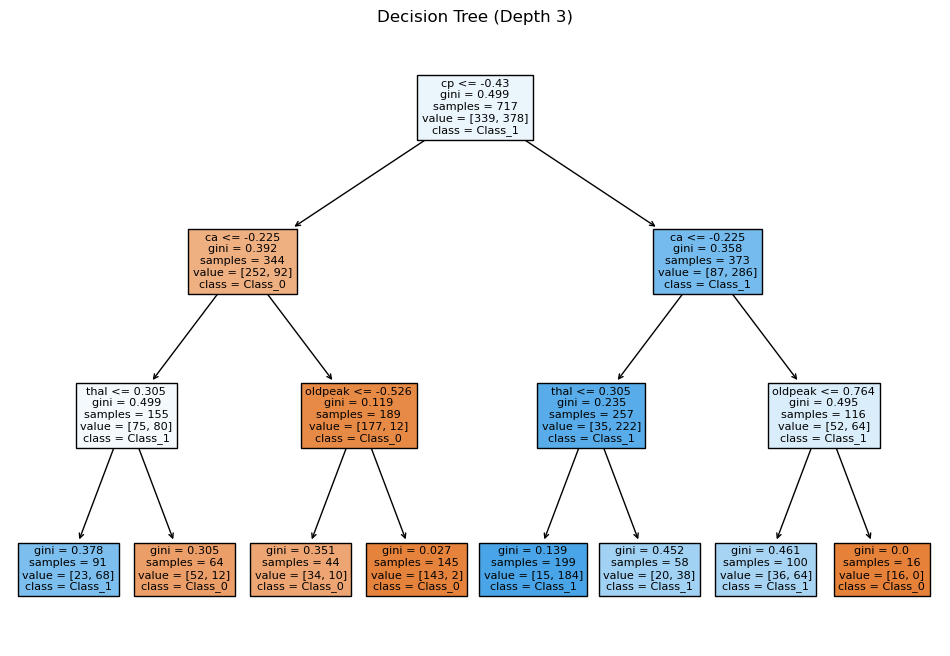

Depth: 5, Training Accuracy: 0.9079497907949791, Validation Accuracy: 0.8636363636363636


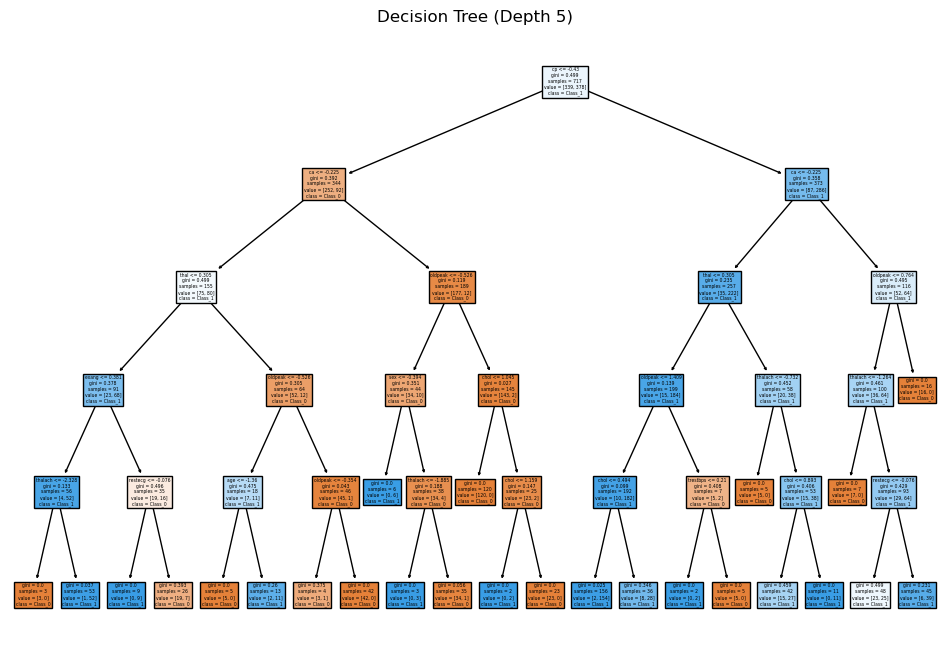

Depth: 7, Training Accuracy: 0.9693165969316597, Validation Accuracy: 0.9545454545454546


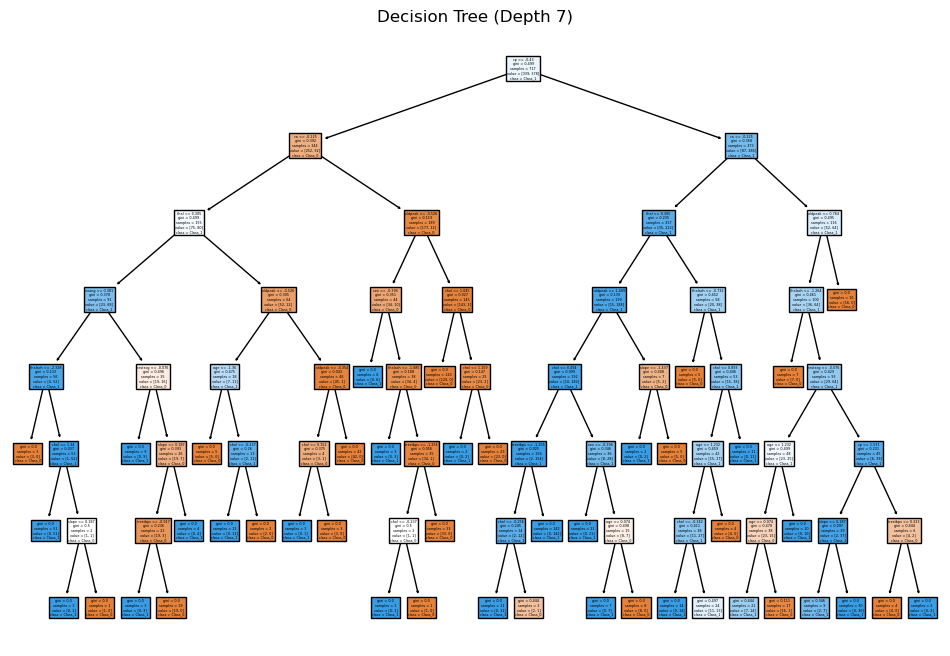

In [69]:
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    

    acc_train = accuracy_score(y_train, y_train_pred)
    acc_val = accuracy_score(y_val, y_val_pred)
    
    models[f"Depth_{depth}"] = model
    accuracies_train[f"Depth_{depth}"] = acc_train
    accuracies_val[f"Depth_{depth}"] = acc_val
    trees[f"Depth_{depth}"] = model
    
    print(f"Depth: {depth}, Training Accuracy: {acc_train}, Validation Accuracy: {acc_val}")
    
    # Plot the decision tree
    plt.figure(figsize=(12, 8))
    plot_tree(model, feature_names=X_train.columns, class_names=["Class_0", "Class_1"], filled=True)
    plt.title(f"Decision Tree (Depth {depth})")
    plt.show()

#The model with the highest validation accuracy is best, since it performs best on unseen data

#BEST MODEL HAS DEPTH 3

#Gini index) is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the set. It's used as a criterion for splitting nodes in a decision tree during the construction process.

In [70]:
#logistic regression
#Eda boost anwenden + grid search

## Logistic regression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [72]:
#X = df[["cp", "ca", "thal", "oldpeak", "exang"]] 
#y = df[["target"]]

In [73]:
X = df.drop(["target"], axis=1)
y = df[["target"]]  

In [74]:
y = y.values.ravel() #transforming into 1D array

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 24)

In [76]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [77]:
# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test_scaled)[:, 1]

# Print the first ten predicted probabilities of a diagnosis for the first 10 individuals in the test set (ranges from 0.02 to 0.92)
print(y_pred_probs[:10])

[0.02454755 0.92078939 0.92167597 0.68310522 0.00280348 0.00280348
 0.59329282 0.84641563 0.83473068 0.90321209]


In [78]:
roc_auc = roc_auc_score(y_test, y_pred_probs)
print("ROC AUC Score:", roc_auc)

# Predict the class labels on the test data
y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

ROC AUC Score: 0.9297584541062802
Accuracy: 0.8731707317073171


In [79]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85        90
           1       0.87      0.91      0.89       115

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



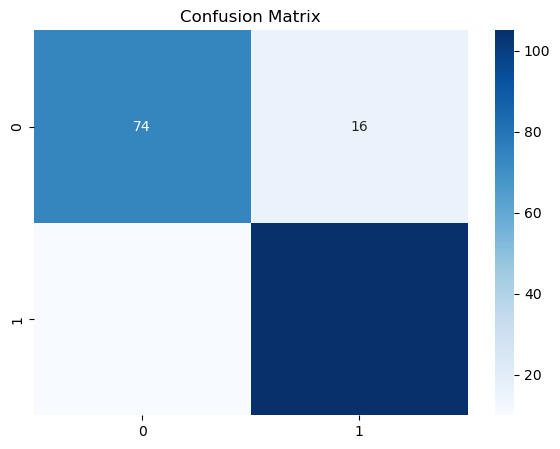

Confusion Matrix:
 [[ 74  16]
 [ 10 105]]


In [80]:
conf_matrix = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:\n", conf_matrix)

## Interpret confusion matrix values:
True Positives (TP): 105
False Positives (FP): 16
True Negatives (TN): 74
False Negatives (FN): 10

## Plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

The test labels, y_test, and the predicted probabilities of the test features belonging to the positive class, y_pred_probs, have been preloaded for you, along with matplotlib.pyplot as plt. When calculating ROC score - 1.0 is ideal.

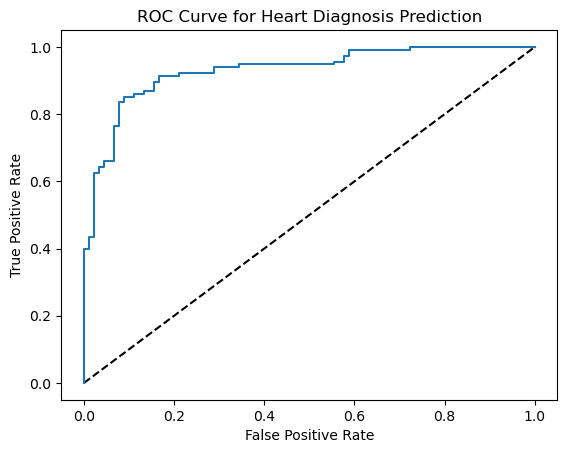

In [81]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Diagnosis Prediction')
plt.show()

In [82]:
print(roc_auc_score(y_test, y_pred_probs))

0.9297584541062802


## Applying grid search & cross val to try to improve the results:

In [83]:
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold

X = df.drop(["target"], axis=1)
y = df["target"].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=3000)

param_grid = {
    'C': [0.01, 0.05, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

# StratifiedKFold wird bei Classifikation-Problemen verwendet
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = []
roc_auc_scores = []

for train_idx, test_idx in cv.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y[train_idx], y[test_idx]
    
    # Daten in jedem Fold skalieren
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_test_fold_scaled = scaler.transform(X_test_fold)
    

    model = clone(best_model)  # Clone the base model
    model.fit(X_train_fold_scaled, y_train_fold)
    models.append(model)
    
    y_pred_proba_fold = model.predict_proba(X_test_fold_scaled)[:, 1]
    score = roc_auc_score(y_test_fold, y_pred_proba_fold)
    roc_auc_scores.append(score)

roc_auc_scores = np.array(roc_auc_scores)

best_index = np.argmax(roc_auc_scores)

best_model_cv = models[best_index]

print("Cross-Validation ROC AUC Scores:", roc_auc_scores)
print("Mean Cross-Validation ROC AUC Score:", roc_auc_scores.mean())
print(f'Best ROC AUC Score after Cross-Validation : {roc_auc_scores[best_index]}')
print(f'Best Model according to cross-val. is: {best_model_cv}')


Cross-Validation ROC AUC Scores: [0.90714286 0.94057143 0.9227619  0.90190476 0.9309129 ]
Mean Cross-Validation ROC AUC Score: 0.9206587709983938
Best ROC AUC Score after Cross-Validation : 0.9405714285714286
Best Model according to cross-val. is: LogisticRegression(C=0.05, max_iter=3000, solver='liblinear')


## Now I take best model I found during cross-val, train it on full data set and avaluate

In [84]:
X = df.drop(["target"], axis=1)
y = df[["target"]]  

y = y.values.ravel() #transforming into 1D array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 24)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#best_model_cv = LogisticRegression(C=0.05, solver='liblinear', max_iter=3000)
best_model_cv.fit(X_train_scaled, y_train)

y_pred_probs = best_model_cv.predict_proba(X_test_scaled)[:, 1]
print(y_pred_probs[:10])

[0.05066276 0.86760837 0.88230086 0.67758447 0.00891478 0.00891478
 0.59665689 0.81364254 0.77442356 0.86732964]


ROC AUC Score: 0.932463768115942
Accuracy: 0.848780487804878
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82        90
           1       0.83      0.91      0.87       115

    accuracy                           0.85       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.85      0.85       205



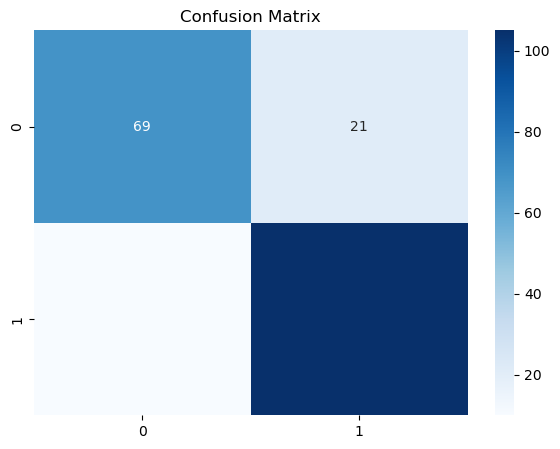

Confusion Matrix:
 [[ 69  21]
 [ 10 105]]


In [85]:
roc_auc = roc_auc_score(y_test, y_pred_probs)
print("ROC AUC Score:", roc_auc)

# Predict the class labels on the test data
y_pred = best_model_cv.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:\n", conf_matrix)